In [1]:
#Função que gere o filtro da média de tamanho n:
def filtro_media_n(n):
    filtro_h = list()
    for i in range(1, n+1):
        filtro_h.append(1/n)
    return filtro_h

In [2]:
#Gerando o filtro de média 5
m_5 = filtro_media_n(5)
print(m_5)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [3]:
#Gerando o filtro de média 11
m_11 = filtro_media_n(11)
print(m_11)

[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


In [4]:
#Função para obter y1[n] = x[n]*m_5[n]
# x[n] é o sinal de entrada
# Tenho que proceder com o cálculo y[n] = somatório de h[k] * x[n - k], em k=0 até w
# w é o número de coeficientes do filtro conhecido como suporte de h[].
# Acho que w = N + M - 1

In [5]:
# Retorna o número de sinais de entrada do arquivo txt e o vetor de entrada
def quant_lista_arquivo(nome_arquivo):
    with open(nome_arquivo, "r") as f:
        num_lines = 0
        vetor_entrada_sinais = list()
        for i, l in enumerate(f):
            # se não é uma linha em branco, adiciona na lista de sinais e conta o registro
            if l.strip():
                vetor_entrada_sinais.append(float(l.strip()))
                num_lines += 1
    return(num_lines, vetor_entrada_sinais)
    
quant_sinais, vetor_entrada_sinais = quant_lista_arquivo("dolar.txt")
print(vetor_entrada_sinais)
print(quant_sinais)


[4.2824, 4.2432, 4.2306, 4.1945, 4.2077, 4.1817, 4.1707, 4.1829, 4.2126, 4.1902, 4.162, 4.1851, 4.1756, 4.133, 4.1468, 4.0963, 4.0927, 4.0649, 4.0679, 4.0618, 4.0672, 4.0263, 4.0195, 4.0195, 4.0195, 4.046, 4.056, 4.0838, 4.0838, 4.0835, 4.1025, 4.0697, 4.0634, 4.0719, 4.0632, 4.1082, 4.0908, 4.1242, 4.147, 4.1425, 4.1414, 4.186, 4.208, 4.2066, 4.2234, 4.2367, 4.1902, 4.2638, 4.2332, 4.2268, 4.1966, 4.1932, 4.1965, 4.1945, 4.218, 4.1962, 4.1951, 4.1704, 4.1677, 4.1518, 4.1635, 4.1007, 4.0836, 3.9937, 4.0156, 3.9903, 4.0184, 3.9909, 3.9986, 3.991, 4.0038, 4.0415, 4.0346, 4.0819, 4.1293, 4.1117, 4.1643, 4.1518, 4.1807, 4.1265, 4.1097, 4.1095, 4.1104, 4.0954, 4.1071, 4.0556, 4.0841, 4.1293, 4.159, 4.1556, 4.1602, 4.1711, 4.149, 4.165, 4.1638, 4.148, 4.1678, 4.1112, 4.0777, 4.081, 4.0849, 4.0608, 4.068, 4.0808, 4.0953, 4.0618, 4.1094, 4.095, 4.1681, 4.1871, 4.1453, 4.1688, 4.1682, 4.1311, 4.1571, 4.1198, 4.0706, 4.0269, 4.0542, 4.0743, 4.0058, 3.991, 4.0526, 3.966, 3.9855, 3.9416, 3.9199, 3

In [6]:
# y[n] = h[k] * x[n - k]
# primeiro elemento de y: y[0]. Primeira amostra é a ultima
# y[0] = h[0] * x[0 - 0]
# y[0] = 0,2 * 4,2824

# Critério de parada. Dimensão de y
def dimensao_y_n(quant_sinais, filtro):
    dimensao_y_n = quant_sinais + len(filtro) - 1
    return dimensao_y_n

# Considerando o filtro m5
dim_y = dimensao_y_n(quant_sinais, m_5)


In [7]:
# Calcula a soma de cada interação no somatório da convolução (ainda não mostra a soma total)
def gera_dicionario_yn(sinais_entrada, filtro_h, dimensao_y):
    dicionario_y = dict()
    dimensao_filtro_h = len(filtro_h)
    
    for n in range(dimensao_y):
        dicionario_y[n] = 0
        for k in range(dimensao_filtro_h):
            try:
                sinal_se_existe = sinais_entrada[n - k]
                
            except:
                sinal_se_existe = 0
            
            dicionario_y[n] = dicionario_y[n] + (filtro_h[k] * sinal_se_existe)
    
    return dicionario_y
            
                

        
dicionario_y = gera_dicionario_yn(vetor_entrada_sinais, m_5, dim_y)
print(dicionario_y)
    

{0: 2.75694, 1: 3.1303600000000005, 2: 3.50118, 3: 3.86256, 4: 4.23168, 5: 4.211539999999999, 6: 4.19704, 7: 4.1875, 8: 4.191120000000001, 9: 4.187620000000001, 10: 4.183680000000001, 11: 4.18656, 12: 4.1851, 13: 4.169180000000001, 14: 4.1605, 15: 4.14736, 16: 4.1288800000000005, 17: 4.10674, 18: 4.09372, 19: 4.07672, 20: 4.0709, 21: 4.05762, 22: 4.04854, 23: 4.03886, 24: 4.0304, 25: 4.026160000000001, 26: 4.0321, 27: 4.0449600000000006, 28: 4.05782, 29: 4.07062, 30: 4.08192, 31: 4.08466, 32: 4.08058, 33: 4.078200000000001, 34: 4.07414, 35: 4.07528, 36: 4.0795, 37: 4.09166, 38: 4.106680000000001, 39: 4.122540000000001, 40: 4.12918, 41: 4.14822, 42: 4.16498, 43: 4.1769, 44: 4.19308, 45: 4.21214, 46: 4.21298, 47: 4.22414, 48: 4.22946, 49: 4.2301400000000005, 50: 4.22212, 51: 4.22272, 52: 4.2092600000000004, 53: 4.20152, 54: 4.19976, 55: 4.199680000000001, 56: 4.200060000000001, 57: 4.19484, 58: 4.1894800000000005, 59: 4.17624, 60: 4.169700000000001, 61: 4.15082, 62: 4.13346, 63: 4.09866,

In [8]:
saida_vetor_y = list()
for key, value in dicionario_y.items():
    saida_vetor_y.append(value)
     

[2.75694,
 3.1303600000000005,
 3.50118,
 3.86256,
 4.23168,
 4.211539999999999,
 4.19704,
 4.1875,
 4.191120000000001,
 4.187620000000001,
 4.183680000000001,
 4.18656,
 4.1851,
 4.169180000000001,
 4.1605,
 4.14736,
 4.1288800000000005,
 4.10674,
 4.09372,
 4.07672,
 4.0709,
 4.05762,
 4.04854,
 4.03886,
 4.0304,
 4.026160000000001,
 4.0321,
 4.0449600000000006,
 4.05782,
 4.07062,
 4.08192,
 4.08466,
 4.08058,
 4.078200000000001,
 4.07414,
 4.07528,
 4.0795,
 4.09166,
 4.106680000000001,
 4.122540000000001,
 4.12918,
 4.14822,
 4.16498,
 4.1769,
 4.19308,
 4.21214,
 4.21298,
 4.22414,
 4.22946,
 4.2301400000000005,
 4.22212,
 4.22272,
 4.2092600000000004,
 4.20152,
 4.19976,
 4.199680000000001,
 4.200060000000001,
 4.19484,
 4.1894800000000005,
 4.17624,
 4.169700000000001,
 4.15082,
 4.13346,
 4.09866,
 4.07142,
 4.03678,
 4.02032,
 4.00178,
 4.00276,
 3.99784,
 4.00054,
 4.00516,
 4.0139000000000005,
 4.03056,
 4.05822,
 4.0798000000000005,
 4.104360000000001,
 4.127800000000001,


In [9]:
# Plotar o gráfico com o filtro
# importing the required module 
import matplotlib.pyplot as plt

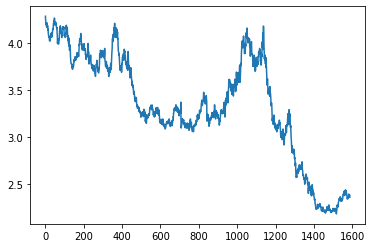

In [10]:
#Plotar o gráfico sem filtro
y_bruto = vetor_entrada_sinais
x_bruto = list()
for valor in range(len(vetor_entrada_sinais)):
    x_bruto.append(valor)
plt.plot(x_bruto, y_bruto)
plt.show()

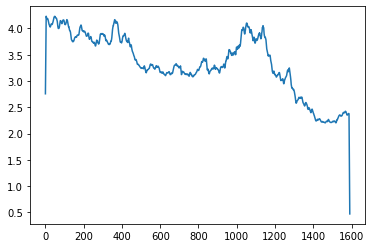

In [11]:
#Plotar filtrado pelo filtro media 5
x = list()
for valor in range(len(saida_vetor_y)):
    x.append(valor)

y = saida_vetor_y
    
plt.plot(x, y)

plt.show()

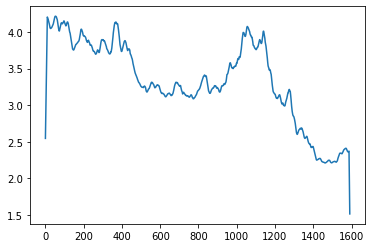

In [12]:
#Plotar filtrando pela média 11
dicionario_y = gera_dicionario_yn(vetor_entrada_sinais, m_11, dim_y)
saida_vetor_y = list()
for key, value in dicionario_y.items():
    saida_vetor_y.append(value)
    
#Plotar filtrado pelo filtro media 11
x = list()
for valor in range(len(saida_vetor_y)):
    x.append(valor)

y = saida_vetor_y
    
plt.plot(x, y)

plt.show()
